# Importing Libraries & Image

In [ ]:
from PIL import Image
from google.colab import files
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

Saving cat.jpg to cat.jpg


In [ ]:
im = cv.imread('cat.jpg', 0)
#im = Image.open('cat.jpg')

# 1. High Pass Filtering

# Built-in

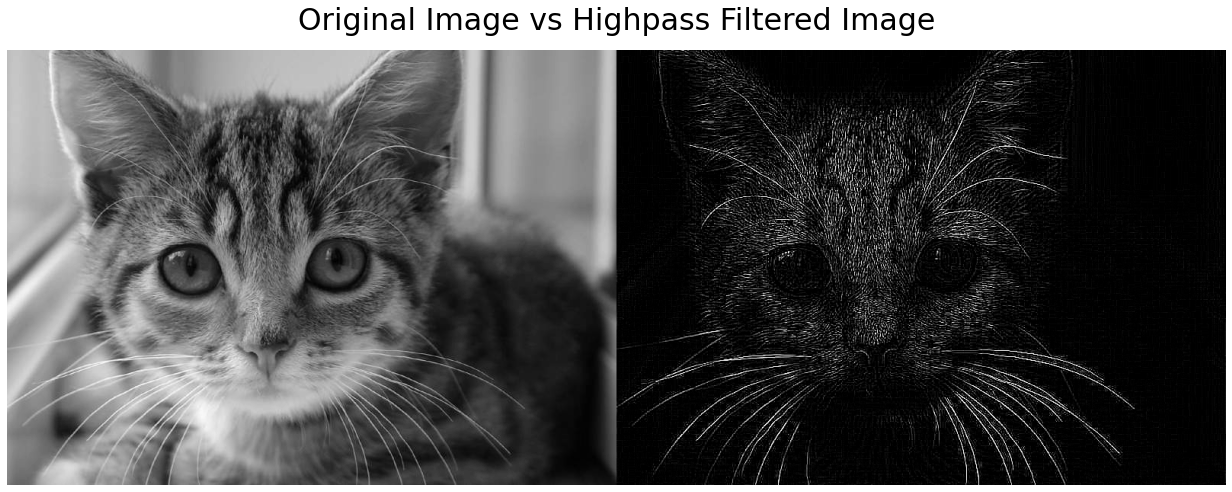

In [ ]:
Sharpen_Kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
Edge_Detection_kernel = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
Edge_Detection_kernel2 = np.array([[-1, -1, -1],[-1, 9, -1],[-1, -1, -1]])

output = cv.filter2D(src=im, kernel=Edge_Detection_kernel, ddepth=-1)

res = np.hstack([im, output])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Highpass Filtered Image (Built-in)', fontsize=30, color='white', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 2. Highboost

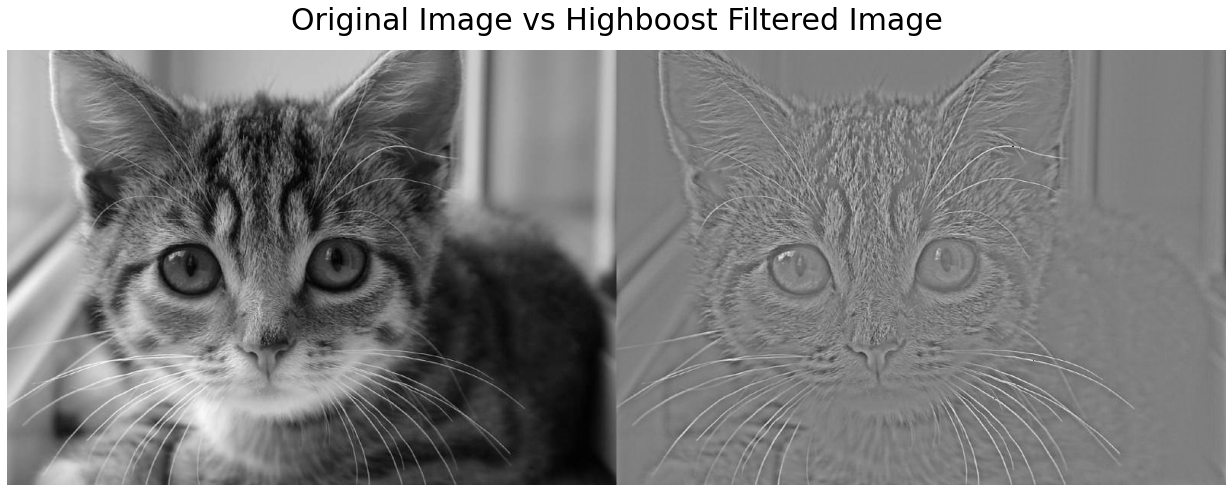

In [ ]:
blur = cv.GaussianBlur(im,(31,31),0)
filtered = im - blur
filtered = filtered + 127 * np.ones(filtered.shape, np.uint8)

res = np.hstack([im, filtered])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Highboost Filtered Image', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 3. Prewit

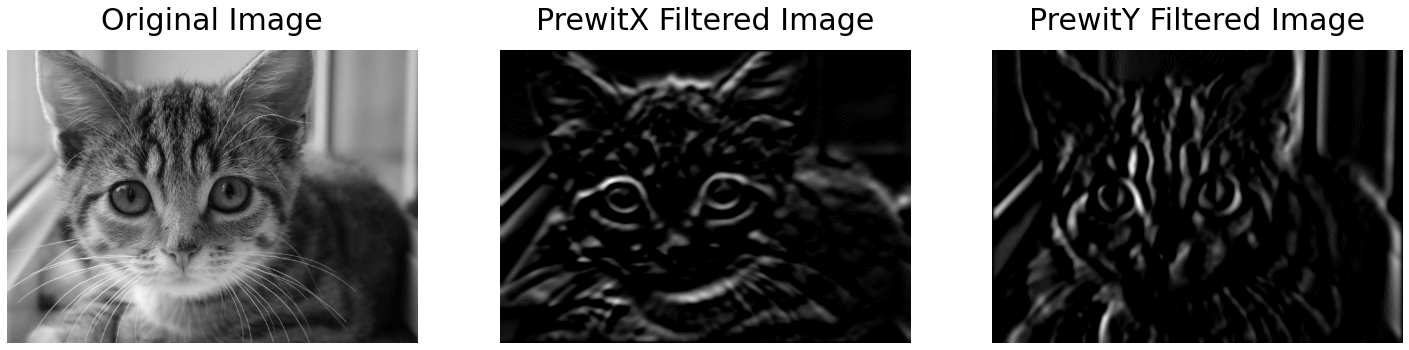

In [ ]:
import numpy as np

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(blur, -1, kernelx)
img_prewitty = cv.filter2D(blur, -1, kernely)

res = np.hstack([im, img_prewittx])
res2 = np.hstack([im, img_prewitty])

f=plt.figure(figsize=(25,8))
f.add_subplot(1,3,1)
plt.title('Original Image', fontsize=30, color='black', pad=20)
plt.imshow(im,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,2)
plt.title('PrewitX Filtered Image', fontsize=30, color='black', pad=20)
plt.imshow(img_prewittx,cmap='gray')
plt.axis('off')
f.add_subplot(1,3,3)
plt.title('PrewitY Filtered Image', fontsize=30, color='black', pad=20)
plt.imshow(img_prewitty,cmap='gray')
plt.axis('off')
plt.show(block=True)

# 4. Sobel

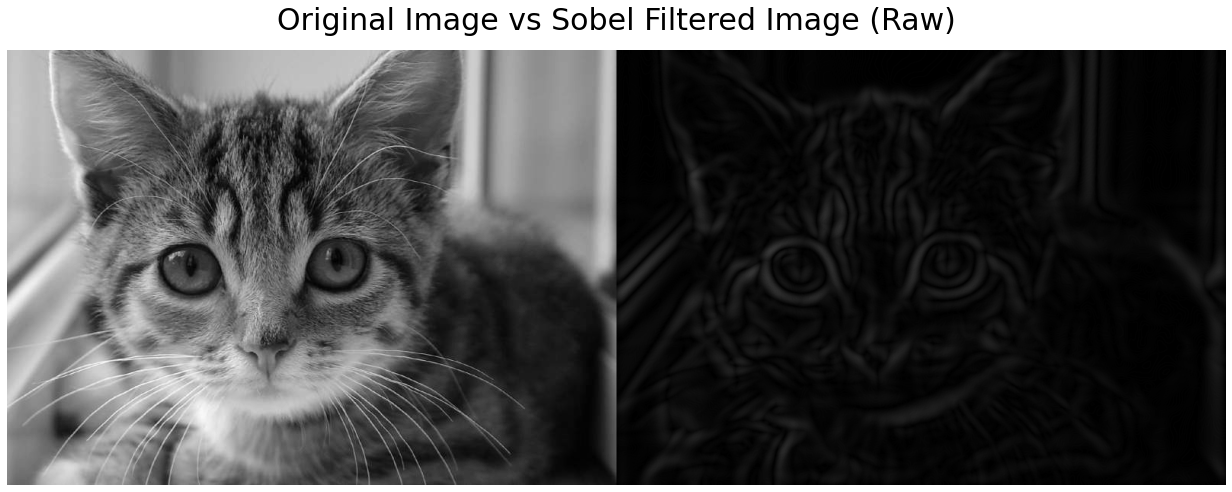

In [ ]:
scale = 1
delta = 0
ddepth = cv.CV_16S
grad_x = cv.Sobel(blur, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(blur, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

res = np.hstack([im, grad])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Sobel Filtered Image (Raw)', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 5. Robert

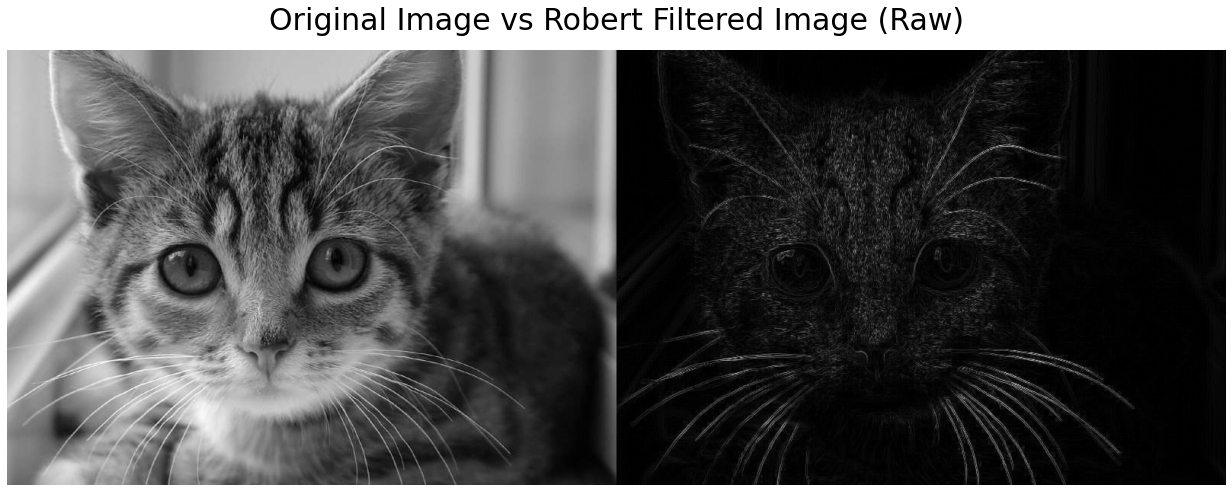

In [ ]:
from scipy import ndimage
roberts_cross_v = np.array( [[1, 0 ], [0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ], [ -1, 0 ]] )
  
img = im.astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255

res = np.hstack([im, edged_img])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Robert Filtered Image (Raw)', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 6. Laplacian

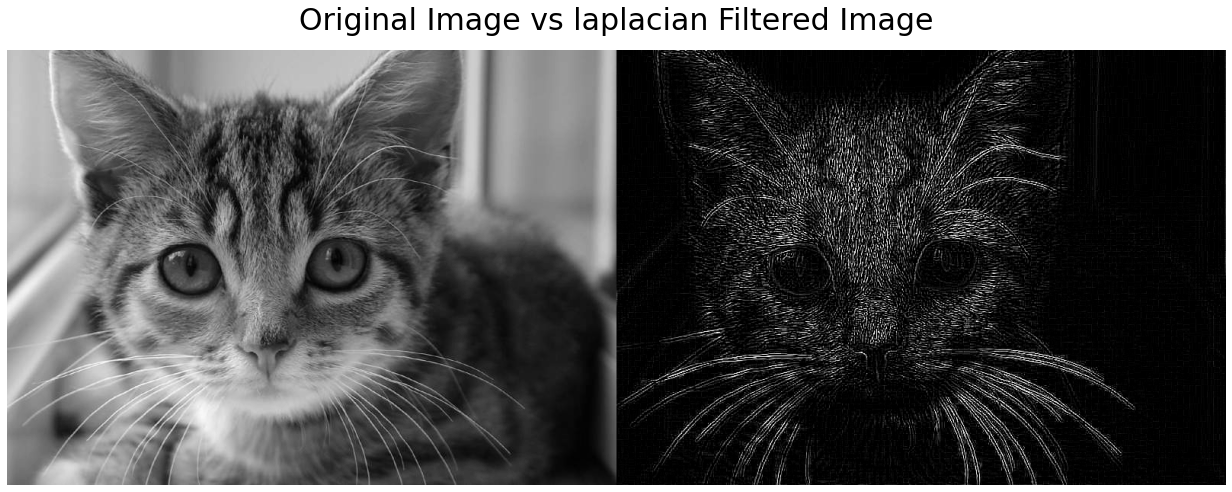

In [ ]:
import numpy as np
edge = cv.Laplacian(im, -1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)

res = np.hstack([im, edge])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs laplacian Filtered Image', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)

# 7. Canny

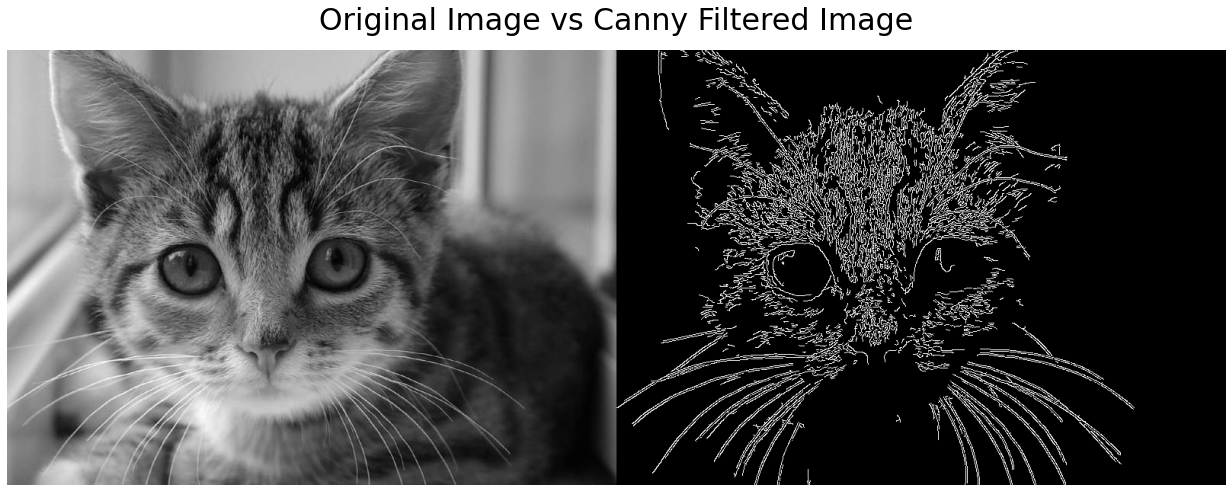

In [ ]:
img_canny = cv.Canny(im,100,200)
res = np.hstack([im, img_canny])
f=plt.figure(figsize=(25,8))
plt.title('Original Image vs Canny Filtered Image', fontsize=30, color='black', pad=20)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show(block=True)